In [278]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

In [279]:
def bloch(var, t, T, b1, B1, phi, dw, T1, T2, M0):
    Mx, My, Mz = var
    R1 = 1/T1
    R2 = 1/T2
        
    gamma = 1
    tw = 1
    nz = 1
    B = B1(t,b1,tw,nz)
    
    dMxdt = My*dw -Mz*gamma*B*np.sin(phi) -R2*Mx
    dMydt = Mz*gamma*B*np.cos(phi) -Mx*dw -R2*My
    dMzdt = Mx*B*np.sin(phi) -My*B*np.cos(phi) -(Mz-M0)*R1
    
    return [dMxdt, dMydt, dMzdt]


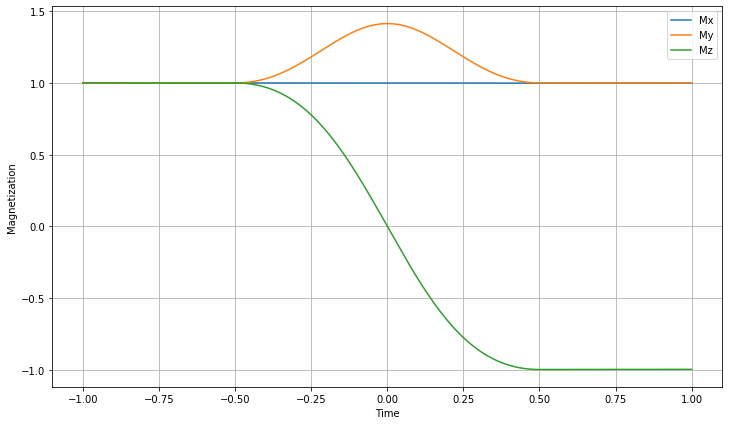

In [280]:
t0 = -1
t1 = 1

ts = np.linspace(t0, t1, 10001)
M_init = [1,1,1]


T1 = 1000
T2 = 1000
M0 = 1 
b1 = 2.664
phi = 0
dw = 0

def B1_sinc(t, b1, tw, nz):
    trf = nz*tw
    if(t==0):
        return 0
    elif(-0.5*trf <= t  and t <= 0.5*trf):
        return b1*np.sin(2*np.pi*t/tw)/(2*np.pi*t/tw)
    else:
        return 0

res = np.array(odeint(bloch, M_init, ts, args=(t1, b1, B1_sinc, phi, dw, T1, T2, M0)))


plt.figure(figsize=(12,7))
plt.plot(ts, res[:,0], label="Mx")
plt.plot(ts, res[:,1], label="My")
plt.plot(ts, res[:,2], label="Mz")
plt.xlabel("Time")
plt.ylabel("Magnetization")
plt.legend()
plt.grid()
plt.show()

In [281]:
def blochG(var, t, x, T, b1, B1, phi, dw, T1, T2, M0, Gstr):
    Mx, My, Mz = var
    R1 = 1/T1
    R2 = 1/T2
        
    gamma = 1
    tw = 1
    nz = 10
    trf = nz*tw
    dx = 2
    B = B1(t,b1,tw,nz)
    G = Gstr * 2*np.pi/(gamma*tw*dx)
    
    if(-0.5*trf <= t  and t <= 0.5*trf):
        dOmega = gamma*G*x
    else:
        dOmega = dw
    
    dMxdt = My*dOmega -Mz*gamma*B*np.sin(phi) -R2*Mx
    dMydt = Mz*gamma*B*np.cos(phi) -Mx*dOmega -R2*My
    dMzdt = Mx*B*np.sin(phi) -My*B*np.cos(phi) -(Mz-M0)*R1
    
    return [dMxdt, dMydt, dMzdt]


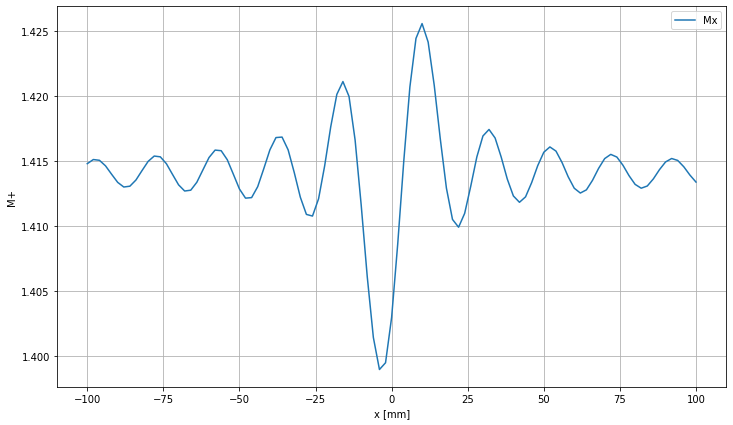

In [277]:
x0 = -100
x1 = 100

M_init = [1,1,1]
T1 = 1000
T2 = 1000
M0 = 1 
b1 = 3.02
phi = 0
dw = 0

def B1_sinc(t, b1, tw, nz):
    trf = nz*tw
    if(t==0):
        return 0
    elif(-0.5*trf < t  and t < 0.5*trf):
        return b1*np.sin(2*np.pi*t/tw)/(2*np.pi*t/tw)
    else:
        return 0

ts = np.linspace(-1,1,10001)
xs = np.linspace(x0,x1,101)
tp = 0.5
Mps = []

for x in xs:
    res = np.array(odeint(blochG, M_init, ts, args=(x, t1, b1, B1_sinc, phi, dw, T1, T2, M0, 1)))
    Mplus = res[:,0] + 1j*res[:,1]
    Mps.append(np.absolute(Mplus[500]))

plt.figure(figsize=(12,7))
plt.plot(xs, Mps, label="Mx")
plt.xlabel("x [mm]")
plt.ylabel("M+")
plt.legend()
plt.grid()
plt.show()